# Perceptron Algorithm

#### Import Iris data

In [1]:
from sklearn import datasets
import numpy as np 
from __future__ import division

In [2]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print 'Class labels:',np.unique(y),iris.target_names

Class labels: [0 1 2] ['setosa' 'versicolor' 'virginica']


#### Split the dataset

In [4]:
from sklearn.cross_validation import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_train, y_test

(array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2,
        0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2,
        0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2,
        2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0]),
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
        0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0]))

#### Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler() # initialize a new StandardScaler object and assign to variable sc 
sc.fit_trasform(X_train) 
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### Fitting the model

In [10]:
from sklearn.linear_model import Perceptron

In [8]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

#### Evaluation

In [9]:
y_pred = ppn.predict(X_test_std)
error = np.sum(y_pred != y_test)
print 'Misclassified samples: {}'.format(error)
print 'Misclassification error: {}'.format(round(error/len(y_pred),4))
print 'Accuracy: {}%'.format(100*round(1-error/len(y_pred),4))

Misclassified samples: 4
Misclassification error: 0.0889
Accuracy: 91.11%


In [10]:
from sklearn.metrics import accuracy_score
print 'Accuracy: %.2f'%accuracy_score(y_test,y_pred)

Accuracy: 0.91


In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=(8,5))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

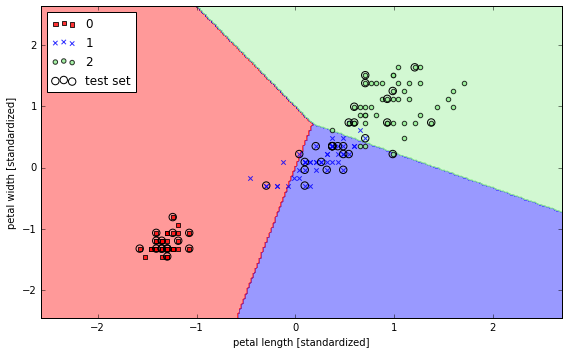

In [13]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X_combined_std, y_combined,classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Logistic Regression Algorithm

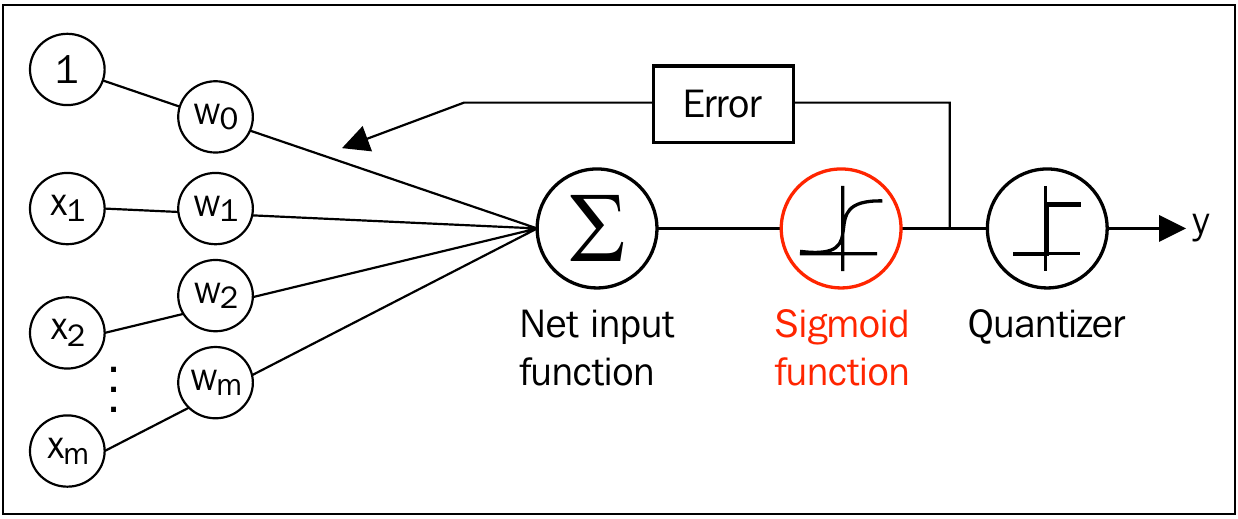

In [14]:
from IPython.display import Image
Image(filename='../../../Pictures/sigmoid.png', width=500) 

#### Sigmoid Function

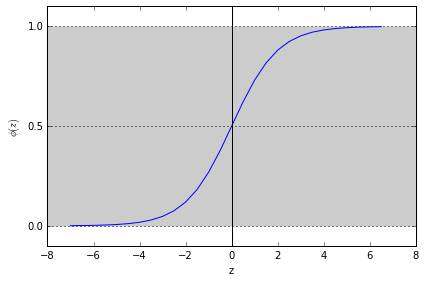

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
z = np.arange(-7,7,0.5)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, c='k')
plt.axhspan(0.0, 1.0, facecolor='.8', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', c='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.tight_layout()
plt.show()

#### Cost for the classification of a single-sample instance for differnet values

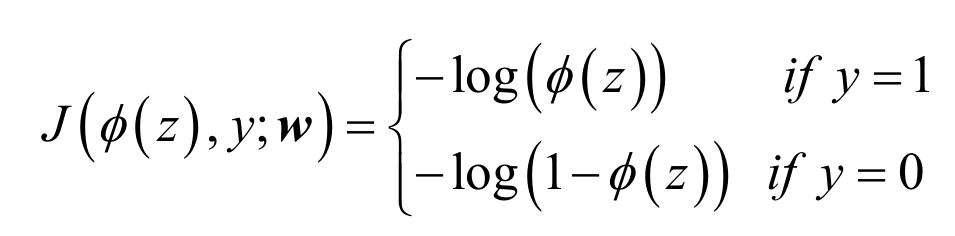

In [16]:
from IPython.display import Image
Image(filename='../../../Pictures/cost_log.png', width=300) 

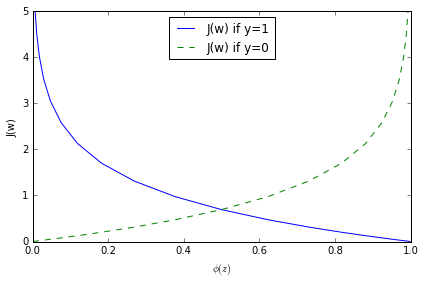

In [17]:
plt.plot(phi_z,-np.log(phi_z),label='J(w) if y=1')
plt.plot(phi_z,-np.log(1-phi_z),'--',label='J(w) if y=0')
plt.ylim([0,5])
plt.legend(loc='best')
plt.ylabel('J(w)')
plt.xlabel('$\phi (z)$')
plt.tight_layout()
plt.show()

#### Implementation

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

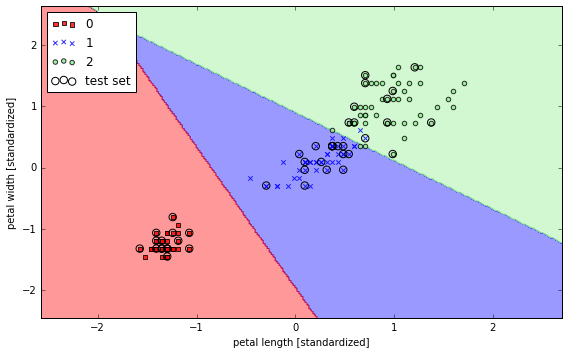

In [20]:
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Prediction

In [21]:
X_test_std[0,:]

array([ 0.70793846,  1.50872803])

In [22]:
print 'Probabilities for class membership of the first observation:',[round(e,4) for e in lr.predict_proba(X_test_std[0,:].reshape(1, -1))[0]]
print iris.target_names

Probabilities for class membership of the first observation: [0.0, 0.0632, 0.9368]
['setosa' 'versicolor' 'virginica']


#### Regularization experiment

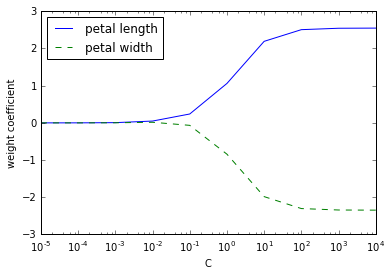

In [23]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:,0], label='petal length')
plt.plot(params, weights[:,1], linestyle='--', label='petal width')
plt.xscale('log')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# Support Vector Machines

In [24]:
from sklearn.svm import SVC

In [25]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

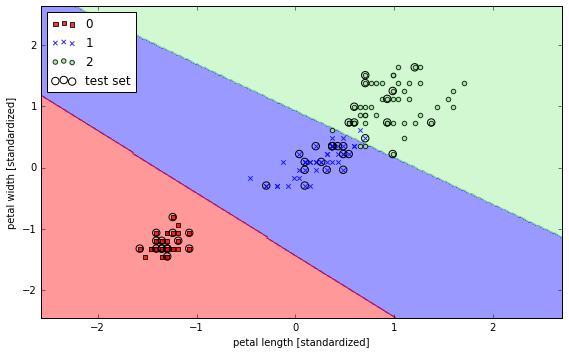

In [26]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Kernel SVM

#### Creating a XOR gate

In [27]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0) # xor gate
y_xor = np.where(y_xor, 1, -1) # create target values

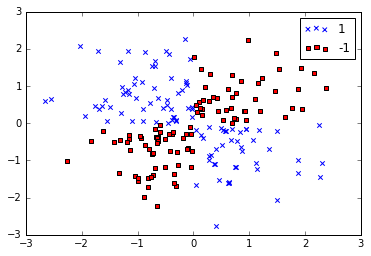

In [28]:
plt.scatter(X_xor[y_xor==1,0], X_xor[y_xor==1,1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1,0], X_xor[y_xor==-1,1], c='r', marker='s', label='-1')
plt.legend()
plt.ylim(-3.0)
plt.show()

#### Fit SVM with Gaussian Kernel

In [29]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

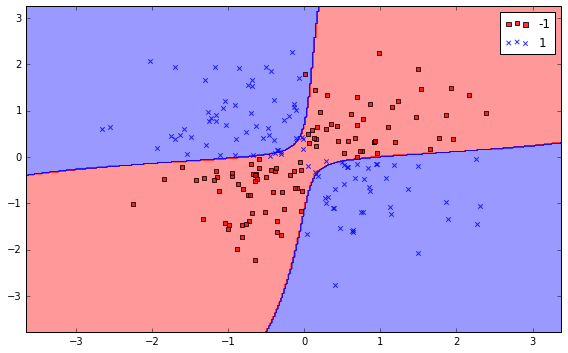

In [30]:
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend()
plt.tight_layout()
plt.show()

## SVM and Iris dataset

gamma = 0.2

In [31]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

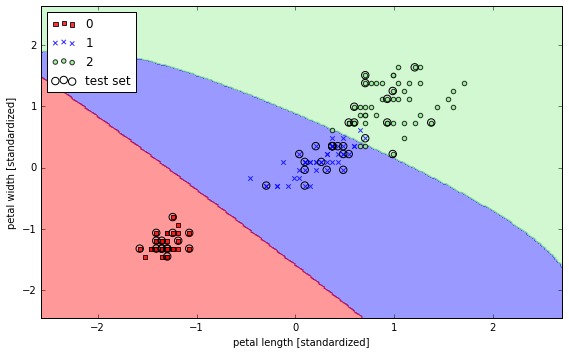

In [32]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

gamma = 100.0

In [33]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

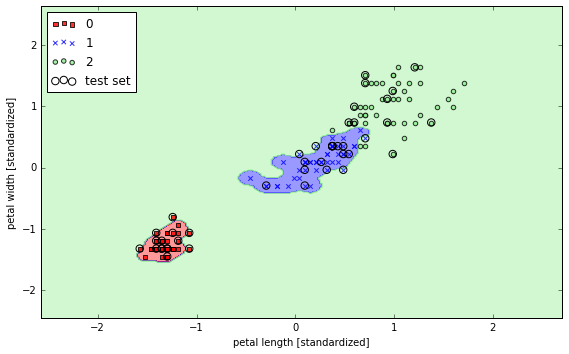

In [34]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Decision Tree Learning

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

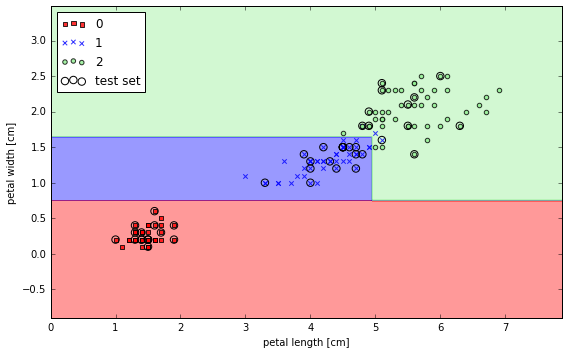

In [50]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Visualizing the Tree

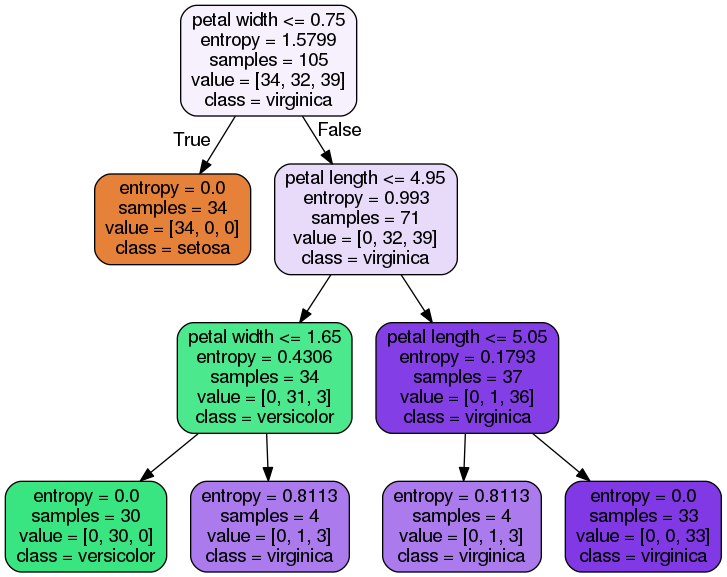

In [71]:
from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()
export_graphviz(tree,
                out_file = dot_data,
                feature_names = ['petal length', 'petal width'] ,
                class_names = ['setosa', 'versicolor', 'virginica'],
                filled = True, rounded = True,
                impurity = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
# graph.write_pdf('tree.pdf')
display(Image(graph.create_png()))

# Random Forests

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

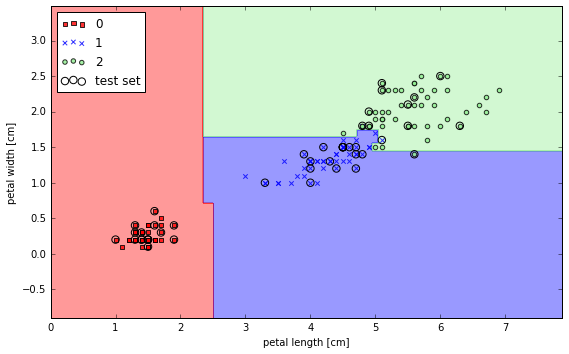

In [91]:
plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# K-nearest Neighbours

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

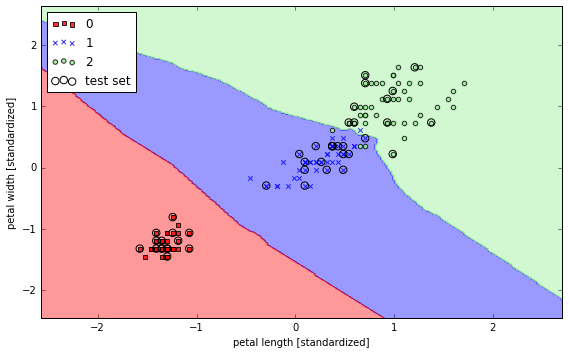

In [99]:
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()